# Exploratory Data Analysis


- [ ]  Basic composition
    - [ ]  df.info
    - [ ]  change datatype
    - [ ]  bar graph: app vs review counts
    - [ ]  pie chart: attraction vs review count
    - [ ]  bar graph: year vs
    - [ ]  rating: side-by-side box plot, box plot for all

In [1]:
# Import Python Libraries
#Data Analysis 
import numpy as np
import pandas as pd
from datetime import datetime

#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
%matplotlib inline

#Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from dash_core_components import Dropdown
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)
from IPython.display import display, HTML

#Warnings
import warnings
warnings.filterwarnings('ignore')

/var/folders/y2/gl6v6t_n63g4cqcss8z26cj00000gn/T/ipykernel_14050/249771819.py:23: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`



## 1. Understanding Data

In [2]:
review_all = pd.read_csv('../data/all_reviews.csv')
review_all.head(5)

,platform,attraction,review,rating,datecolumn,coordinates
0,TripAdvisor,Alcatraz Island,My family took the tour ( BUY TICKETS IN ADVAN...,5.0,"Mar, 2023",NaN
1,TripAdvisor,Alcatraz Island,This is a must stop if you are in San Fran!!! ...,5.0,"Feb, 2023",NaN
2,TripAdvisor,Alcatraz Island,I did not expect to enjoy the tour as much as ...,5.0,"Mar, 2023",NaN
3,TripAdvisor,Alcatraz Island,San Francisco is completely unsafe. We bought ...,1.0,"Mar, 2023",NaN
4,TripAdvisor,Alcatraz Island,I had a 13-hour layover in San Francisco And I...,4.0,"Mar, 2023",NaN


This dataset...
- platform - 
- attraction -
- review -
- rating - 
- datecolumn - 
- coordinate - 


### 1.1 Overall Statistics

In [3]:
review_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10011 entries, 0 to 10010
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   platform     10011 non-null  object 
 1   attraction   10011 non-null  object 
 2   review       9927 non-null   object 
 3   rating       9365 non-null   float64
 4   datecolumn   6947 non-null   object 
 5   coordinates  150 non-null    object 
dtypes: float64(1), object(5)
memory usage: 469.4+ KB


Change data types for datecolumn, Remove null values based on reviews

In [4]:
# Convert the 'date' column to datetime format
review_all['datecolumn'] = pd.to_datetime(review_all['datecolumn'], format='%b, %Y')

# Drop rows with null values in the 'review' column
review_all = review_all.dropna(subset=['review'])

# Drop duplicate
review_all = review_all.drop_duplicates()
review_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9872 entries, 0 to 10010
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   platform     9872 non-null   object        
 1   attraction   9872 non-null   object        
 2   review       9872 non-null   object        
 3   rating       9228 non-null   float64       
 4   datecolumn   6940 non-null   datetime64[ns]
 5   coordinates  150 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 539.9+ KB


In [5]:
platforms = review_all['platform'].unique()
places = review_all['attraction'].unique()

In [6]:
fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(platforms),
    title = {'text': "Platforms",'font': {'color': 'black','size':20}},
    number={'font':{'color': 'black','size':50}},
    domain = {'row': 0, 'column': 0}
))
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(places),
    title = {'text': "Attractions",'font': {'color': 'brown','size':20}},
    number={'font':{'color': 'brown','size':50}},
    domain = {'row': 0, 'column': 1}
))
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(review_all['review']),
    title = {'text': "Reviews",'font': {'color': 'green','size':20}},
    number={'font':{'color': 'green','size':50}},
    domain = {'row': 0, 'column': 2}
))
fig.update_layout(
    grid = {'rows': 1, 'columns': 3, 'pattern': "independent"})
fig.show()
#plotly.offline.plot(fig)

### 1.2 Platform Wise Analysis

Distribution for platform, attraction

In [7]:
fig1 = px.pie(review_all, names='platform')
fig1.update_layout(title='Pie Charts of Platform')
fig1.show()

In [8]:
def platform_piechart(platform, column):
    t_place_count = review_all.loc[review_all['platform']==platform][column].value_counts().sort_values()
    fig = px.pie(t_place_count, 
             values=column, 
             names=t_place_count.index,
             title = f'{column}s from {platform} ')
    fig.show()

In [9]:
for platform in platforms:
    platform_piechart(platform,'attraction')

### 2.3 Attraction Wise Analysis

In [10]:
attraction_count = review_all['attraction'].value_counts()
fig = px.bar(attraction_count.head(10))
fig.update_xaxes(title='Place Name')
fig.update_yaxes(title='# of Reviews')
fig.update_layout(title='# of Reviews for Places (Top 10)')
fig.show()

### 2.4 Date Wise Analysis

In [11]:
review_all['month'] = review_all['datecolumn'].dt.month
review_all['year'] = review_all['datecolumn'].dt.year


In [12]:
year_count = review_all['year'].value_counts()
fig = px.bar(year_count)
fig.update_xaxes(title='Year')
fig.update_yaxes(title='# of Reviews')
fig.update_layout(title='# of Reviews by Year')
fig.show()

In [13]:
year2022 = review_all.loc[(review_all['datecolumn']>'2022-2-28') & (review_all['datecolumn']<'2023-3-1')]
month2022_count = year2022['month'].value_counts()
fig = px.bar(month2022_count)
fig.update_xaxes(title='Month')
fig.update_yaxes(title='# of Reviews')
fig.update_layout(title='# of Reviews by Month from Mar 2022 to Feb 2023')
fig.show()

### 2.5 Rating Wise Analysis

In [14]:
review_all.describe()['rating']

count    9228.000000
mean        4.426094
std         0.957343
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [15]:
fig = px.box(review_all, y='rating')
fig.show()

In [16]:
# group the data by platform
grouped = review_all.groupby('platform')

# create a Box trace for each platform
traces = []
for name, group in grouped:
    trace = go.Box(y=group['rating'], name=name)
    traces.append(trace)

# create the figure layout
layout = go.Layout(title='Side-by-Side Box Plot of Ratings by Platform', yaxis=dict(title='Rating'))

# create the figure object
fig = go.Figure(data=traces, layout=layout)

# show the figure
fig.show()

In [17]:
review_all = review_all.drop(['datecolumn'], axis=1)
review_all.head(5)

,platform,attraction,review,rating,coordinates,month,year
0,TripAdvisor,Alcatraz Island,My family took the tour ( BUY TICKETS IN ADVAN...,5.0,NaN,3.0,2023.0
1,TripAdvisor,Alcatraz Island,This is a must stop if you are in San Fran!!! ...,5.0,NaN,2.0,2023.0
2,TripAdvisor,Alcatraz Island,I did not expect to enjoy the tour as much as ...,5.0,NaN,3.0,2023.0
3,TripAdvisor,Alcatraz Island,San Francisco is completely unsafe. We bought ...,1.0,NaN,3.0,2023.0
4,TripAdvisor,Alcatraz Island,I had a 13-hour layover in San Francisco And I...,4.0,NaN,3.0,2023.0


In [18]:
#review_all.to_csv('review_all_temp.csv', index=False)
review_all = pd.read_csv('review_all_temp.csv')

## 2. NLP on Reviews

### 2.1 Language Detection

In [37]:
review_all = pd.read_csv('../data/review_all_temp.csv')

In [66]:
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
import string
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import re
#import fasttext

[nltk_data] Downloading package punkt to /Users/alliewu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/alliewu/nltk_data...


In [ ]:
# Load the pretrained fasttext model
model = fasttext.load_model('../fasttext/lid.176.bin')

# Tokenize as sentence and detect the language
langs = []
for text in review_all['review']:
    sent = nltk.sent_tokenize(text)
    #print(sent[0])
    try:
      lang = model.predict(sent[0])
      langs.append(str(lang)[12:14])
    except:
      langs.append('en') 
    #print(lang)
review_all['language'] = langs

In [38]:
# create an english column
get_eng = lambda x: 'en' if x == 'en' else 'non-en'
review_all['en'] = review_all['language'].apply(get_eng)

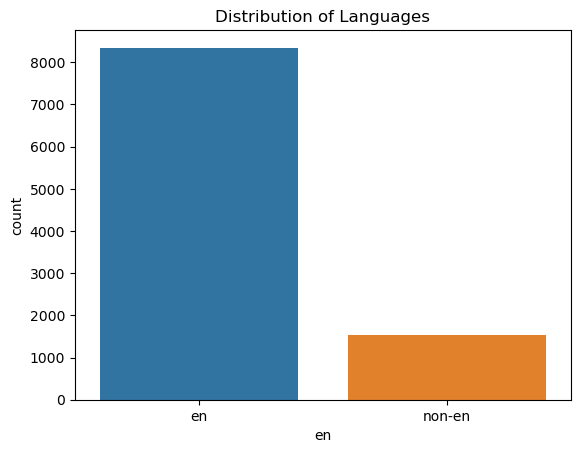

In [39]:
sns.countplot(x='en', data=review_all)
plt.title('Distribution of Languages')
plt.show()

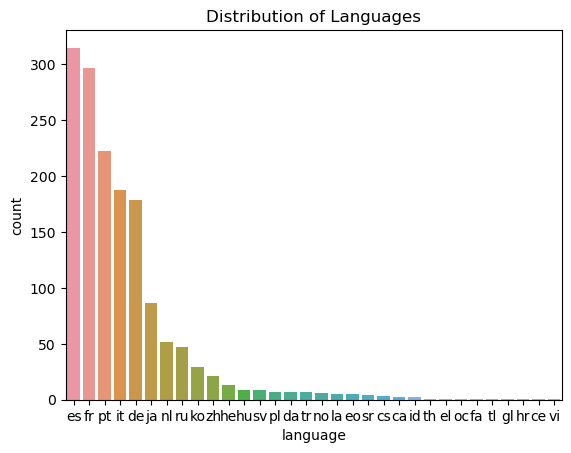

In [40]:
sns.countplot(x='language',
            data=review_all.loc[review_all['language']!='en'], 
            order = review_all.loc[review_all['language']!='en']['language'].value_counts().index[::1])
plt.title('Distribution of Languages')
plt.show()
#review_all['language'].value_counts()

### 2.2 Contraction Expanding

In [41]:
review_nlp = review_all.copy()

In [56]:
def remove_contractions(data):
    words = []
    for word in data.split():
        words.append(contractions.fix(word))
    return words

review_nlp['no_contract'] = review_nlp['review'].apply(remove_contractions)

review_nlp['no_contract'] = [' '.join(map(str, l)) for l in review_nlp['no_contract']]

print(review_nlp['no_contract'][100])

Un luogo che fa parte dell'immaginario collettivo. Tenuto bene e cristallizzato all'epoca della chiusura. Begli scorci della baia e dello skyline di San Francisco. Molto interessante la mostra sul "periodo indiano". Consigliato


### 2.3 Punctuation and Number Removals

In [57]:
punc = string.punctuation
print(punc)
review_nlp['no_punc'] = [word.translate(str.maketrans('', '', punc)) for word in review_nlp['no_contract']]
print(review_nlp['no_punc'][1])

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
This is a must stop if you are in San Fran We did the audio tour and was very interesting We were going to do ther night tour but did not book far enough in advance Should book night tour a week in advance


In [59]:
review_nlp['no_numbers'] = review_nlp['no_punc'].apply(lambda x: re.sub(r'\d+', '', x))
print(review_nlp['no_numbers'][30])

We enjoyed our visit to Alcatraz We liked the idea of taking the ferry over and being able to spend as much time as we needed to see the facility in its entireness The staff was very informative with the history of AlcatrazWe know it is touristy area but one should take the opportunity and educate oneself to the system and what went on


### 2.4 Stopwords Removals

In [62]:
stop_words = stopwords.words('english')
print(f'Stop Words: {stop_words}')

Stop Words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [64]:
review_nlp['no_stopword'] = review_nlp['no_numbers'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
print(review_nlp['no_stopword'][0])

family took tour BUY TICKETS ADVANCE small boys infant difficult maneuver stroller made trek children ferry clean peaceful snack purchase purchased hotdogs drinks advance boat bathroom clean appropriate needs island also clean appropriate facilities steep hills active family struggle audio tour appropriate children enjoyed well educational also lifelong memory made family recommend


### 2.5 Lemmatization

In [69]:
# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize a sentence
def lemmatize_sentence(string):
    words = nltk.word_tokenize(string)
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in words]
    return ' '.join(lemmatized_words)

# Create new column
review_nlp['lemmatized'] = review_nlp['no_stopword'].apply(lemmatize_sentence)
print(review_nlp['lemmatized'][0])

family took tour buy ticket advance small boy infant difficult maneuver stroller made trek child ferry clean peaceful snack purchase purchased hotdog drink advance boat bathroom clean appropriate need island also clean appropriate facility steep hill active family struggle audio tour appropriate child enjoyed well educational also lifelong memory made family recommend


 there are certain cases where the WordNetLemmatizer might not produce the expected lemma. For example, it might not always convert a verb in past tense to its base form in present tense. This is because the WordNetLemmatizer is not a complete morphological analyzer, 

In [71]:
review_nlp.head(5)

,platform,attraction,review,rating,coordinates,month,year,language,en,no_contract,no_punc,no_numbers,no_stopword,lemmatized
0,TripAdvisor,Alcatraz Island,My family took the tour ( BUY TICKETS IN ADVAN...,5.0,NaN,3.0,2023.0,en,en,My family took the tour ( BUY TICKETS IN ADVAN...,My family took the tour BUY TICKETS IN ADVANC...,My family took the tour BUY TICKETS IN ADVANC...,family took tour BUY TICKETS ADVANCE small boy...,family took tour buy ticket advance small boy ...
1,TripAdvisor,Alcatraz Island,This is a must stop if you are in San Fran!!! ...,5.0,NaN,2.0,2023.0,en,en,This is a must stop if you are in San Fran!!! ...,This is a must stop if you are in San Fran We ...,This is a must stop if you are in San Fran We ...,must stop San Fran audio tour interesting goin...,must stop san fran audio tour interesting goin...
2,TripAdvisor,Alcatraz Island,I did not expect to enjoy the tour as much as ...,5.0,NaN,3.0,2023.0,en,en,I did not expect to enjoy the tour as much as ...,I did not expect to enjoy the tour as much as ...,I did not expect to enjoy the tour as much as ...,expect enjoy tour much recorded tour informati...,expect enjoy tour much recorded tour informati...
3,TripAdvisor,Alcatraz Island,San Francisco is completely unsafe. We bought ...,1.0,NaN,3.0,2023.0,en,en,San Francisco is completely unsafe. We bought ...,San Francisco is completely unsafe We bought t...,San Francisco is completely unsafe We bought t...,San Francisco completely unsafe bought tickets...,san francisco completely unsafe bought ticket ...
4,TripAdvisor,Alcatraz Island,I had a 13-hour layover in San Francisco And I...,4.0,NaN,3.0,2023.0,en,en,I had a 13-hour layover in San Francisco And I...,I had a 13hour layover in San Francisco And I ...,I had a hour layover in San Francisco And I wa...,hour layover San Francisco wanted something lo...,hour layover san francisco wanted something lo...
